### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 停牌或未交易價格資料處理 － 廠商回應：  
  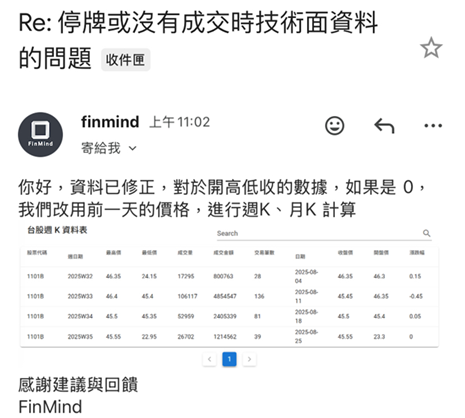  
  基本上處理結果還是不對，這部分就先暫作保留。  

In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
from FinMind.data import DataLoader

In [2]:
# 設定FinMind API
load_dotenv(find_dotenv())
token = os.environ.get('FINMIND_TOKEN')
api = DataLoader()
api.login_by_token(api_token=token)

In [3]:
# 台股週 K 資料表 TaiwanStockWeekPrice (只限 backer、sponsor 會員使用) ： 一次拿特定日期，所有資料(只限 backer、sponsor 使用) #
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockWeekPrice",
    "start_date": '2025-08-25',
    "token": token,
}
resp = requests.get(url, params=parameter)
data = resp.json()
df   = pd.DataFrame(data["data"])

In [4]:
display(df.iloc[df.index[(df['stock_id']=='1101B')]])

,stock_id,yweek,max,min,trading_volume,trading_money,trading_turnover,date,close,open,spread
32565,1101B,2025W35,45.55,22.95,26702,1214562,39,2025-08-25,45.55,23.3,0.0


* 停牌或未交易價格資料處理 － 程式修改：  
  - 將價格資料為零的調整程序獨立於單一函式中。  
  - 昨天的修改是將價格為零的資料刪除，今天則是改為補前一天收盤價的方式為之。
  - 對應程式修改：[StockAnalysis.py](https://github.com/yilintung/StockInvestmentNotebook/commit/e3e1f97dc7ad4e09d5869d8c9f10f73dee878005)、[Utilities.py](https://github.com/yilintung/StockInvestmentNotebook/commit/43b4d1f31fd18b13d8bf4b493a02913216bc5f27#diff-40961ab9f0f23eae3bada68927a135ac704483322091c25554712972eef576f9)。
  - Pandas DataFrame [Copy-on-Write (CoW)](https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#copy-on-write)問題，對應修改[StockAnalysis.py](https://github.com/yilintung/StockInvestmentNotebook/commit/e3e1f97dc7ad4e09d5869d8c9f10f73dee878005)。  

* 引入模組與定義公用函式  

In [5]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [6]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [7]:
mysys.UpdateStockDatabase()

2026-01-20 16:28:07.223 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1713：股票名稱 ＝ 國化，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1722：股票名稱 ＝ 台肥，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1731：股票名稱 ＝ 美吾華，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1733：股票名稱 ＝ 五鼎，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1736：股票名稱 ＝ 喬山，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1762：股票名稱 ＝ 中化生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2303：股票名稱 ＝ 聯電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2315：股票名稱 ＝ 神達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2323：股票名稱 ＝ 中環，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2332：股票名稱 ＝ 友訊，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2350：股票名稱 ＝ 環電，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2356：股票名稱 ＝ 英業達，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2361：股票名稱 ＝ 鴻友，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2364：股票名稱 ＝ 倫飛，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2373：股票名稱 ＝ 震旦行，產業類別 ＝ 其他電子業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2381：股票名稱 ＝ 華宇，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2385：股票名稱 ＝ 群光，產業類別 ＝ 電子零組件業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2393：股票名稱 ＝ 億光，產業類別 ＝ 光電業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2395：股票名稱 ＝ 研華，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2396：股票名稱 ＝ 精碟

2026-01-20 16:28:07.823 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-20 16:28:11.532 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-20 16:28:15.127 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-12
【更新】週Ｋ：2026-01-12


2026-01-20 16:28:20.509 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-13


2026-01-20 16:28:25.753 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-14


2026-01-20 16:28:31.104 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-15


2026-01-20 16:28:36.558 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-16


2026-01-20 16:28:41.814 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-20 16:28:45.440 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-01-20 16:28:49.041 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-19
【略過】週Ｋ：2026-01-19


2026-01-20 16:28:55.137 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2026-01-20


* 建立「解盤」物件    

In [8]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


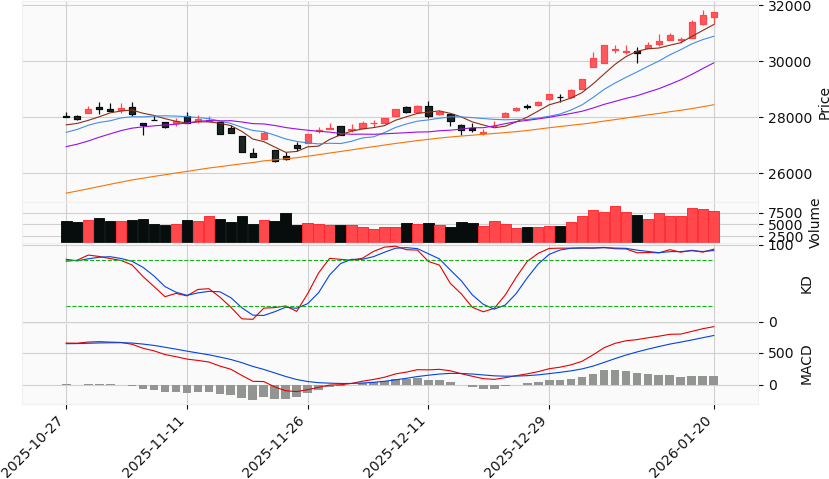

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-15 孕育線／懷抱線 : 2026-01-15
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量大於十日均量，但未至大量門檻（成交量 ＝ 7954.24億元 ，十日均量 ＝ 7545.21億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-26結束。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-20黃金交叉。並且2026-01-20於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-19當週死亡交叉。並且2026-01-19該週在超買區。
整體評價,"價格趨勢 目前為上漲趨勢，近期連續收紅並推升高點至 31,759.99 點。短中期均線呈多頭排列且同步上揚，價格維持在短期均線之上，趨勢延續性佳。 價量關係 上漲段成交量維持在相對高檔（約 7,954.24 億元），屬於價漲量增/量能跟上的型態。惟近兩日量能較前一波高量略降，顯示追價動能仍在但有些許降溫。 支撐與壓力 - 支撐：先看 31,312.07 點（5日線）與 31,340.10 點（當日低點）形成的短線支撐帶；再來是 30,891.98 點（10日線）作為回檔防守。 - 壓力：短線壓力落在 31,827.39 點（近五日高點）附近；若有效突破，則上方屬於尚未形成的壓力區。 KD 指標解讀 K、D 值位於 80 以上的超買區，且K線高於D線，代表多方仍掌控節奏。惟指標處於高檔鈍化區，短線若出現拉回，較可能以高檔震盪/回檔方式消化。 MACD 指標解讀 DIF 線位於 MACD 線之上且雙線持續上行，顯示趨勢偏多、動能仍在。灰色柱狀體維持正值但近端略有收斂，代表上漲動能仍強但有邊走邊降溫的跡象。 綜合評價 整體結構偏多，屬於趨勢上漲延伸段，短線以 31,312.07～31,340.10 點為關鍵防守，守穩則仍有機會挑戰 31,827.39 點。但KD超買與MACD柱狀體收斂並存，操作上宜留意高檔震盪加劇，追價需控管停損並以回檔承接較有利。"


In [9]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


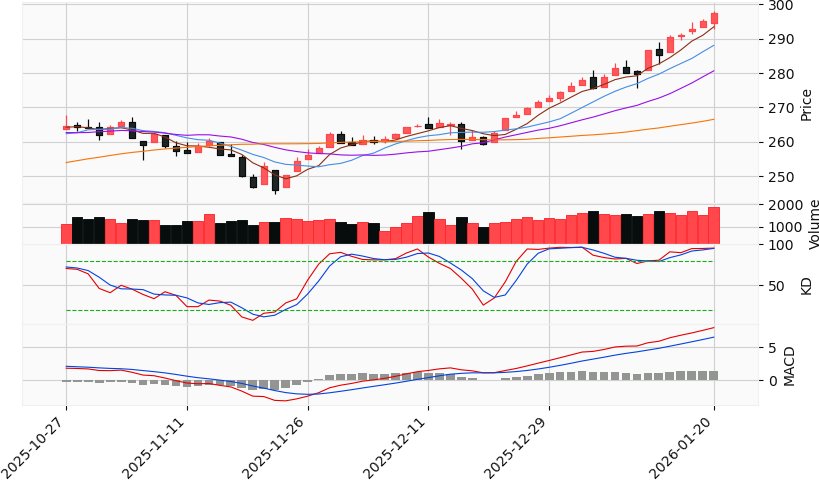

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-15 , 2026-01-16 十字線 : 2026-01-15"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量大於十日均量，但未至大量門檻（成交量 ＝ 1854.79億元 ，十日均量 ＝ 1593.27億元）
型態,反轉型態之頭肩底，型態範圍由2024-09-04開始到2025-12-23結束，估算目標價為346.86點。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-12黃金交叉。並且2026-01-20於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週死亡交叉。並且2026-01-19該週在超買區。
整體評價,價格趨勢 目前為上漲走勢，K線連續走高並推升至約 297.61點，短中期均線呈多頭排列且同步上揚。近五日高點推進至 298.02點，顯示多方仍掌控節奏。 價量關係 上漲過程中成交量維持在相對高檔，且最新一日量能放大至約 1854.79億元，屬於價漲量增的偏多結構。量能能跟上價格創高，有利延續攻勢，但也代表短線追價力道集中、波動可能放大。 支撐與壓力 上方壓力先看近期高點區 298.02點～300點（整數關卡）。下方支撐依序看 295.11點（近端回檔防守位）與 293.45點（短期均線附近），若跌破則支撐下移至 288.05點（短期均線帶）。 KD指標解讀 KD位於80以上超買區，且K、D同步走高並貼近高檔，顯示短線動能強但也偏擁擠。若後續出現高檔鈍化後的回落，較容易引發短線回檔。 MACD指標解讀 DIF位於MACD線之上且雙線持續上行，代表趨勢仍偏多、動能延續。灰色柱狀體同步擴大，顯示多方動能正在增強，尚未看到明顯轉弱訊號。 綜合評價 整體屬於多頭趨勢延伸，均線結構與MACD動能支持續強，但KD處於超買區使短線回檔風險上升。操作上可關注 295.11點／293.45點支撐是否守穩，守穩偏多續抱；若跌破則短線轉為以風險控管、等待回穩再介入較佳。


In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [11]:
results = analysis.screener()

In [12]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

股票代碼 ＝ 5278 ， 股票名稱 ＝ 尚凡 
股票代碼 ＝ 5315 ， 股票名稱 ＝ 光聯 
股票代碼 ＝ 5471 ， 股票名稱 ＝ 松翰 
股票代碼 ＝ 5371 ， 股票名稱 ＝ 中光電 
股票代碼 ＝ 6168 ， 股票名稱 ＝ 宏齊 
股票代碼 ＝ 6657 ， 股票名稱 ＝ 華安 
股票代碼 ＝ 1521 ， 股票名稱 ＝ 大億 
股票代碼 ＝ 1522 ， 股票名稱 ＝ 堤維西 
股票代碼 ＝ 1527 ， 股票名稱 ＝ 鑽全 
股票代碼 ＝ 2401 ， 股票名稱 ＝ 凌陽 
股票代碼 ＝ 2426 ， 股票名稱 ＝ 鼎元 
股票代碼 ＝ 2302 ， 股票名稱 ＝ 麗正 
股票代碼 ＝ 1301 ， 股票名稱 ＝ 台塑 
股票代碼 ＝ 3645 ， 股票名稱 ＝ 達邁 
股票代碼 ＝ 3356 ， 股票名稱 ＝ 奇偶 
股票代碼 ＝ 4561 ， 股票名稱 ＝ 健椿 
股票代碼 ＝ 2481 ， 股票名稱 ＝ 強茂 
股票代碼 ＝ 3094 ， 股票名稱 ＝ 聯傑 
股票代碼 ＝ 3317 ， 股票名稱 ＝ 尼克森 
股票代碼 ＝ 3321 ， 股票名稱 ＝ 同泰 
股票代碼 ＝ 3062 ， 股票名稱 ＝ 建漢 


* 篩選結果  
  - 晟田(4541)  
    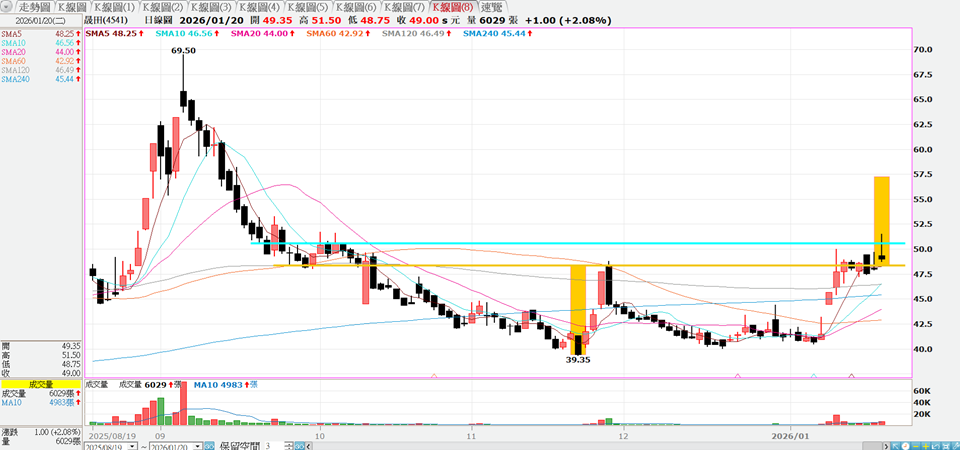  
  - 益得(6461)  
    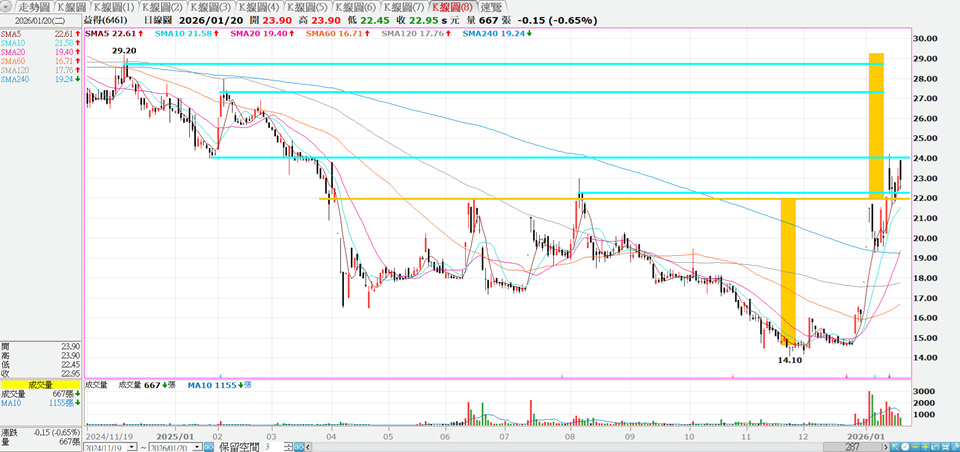  
  - 瑞軒(2489)  
    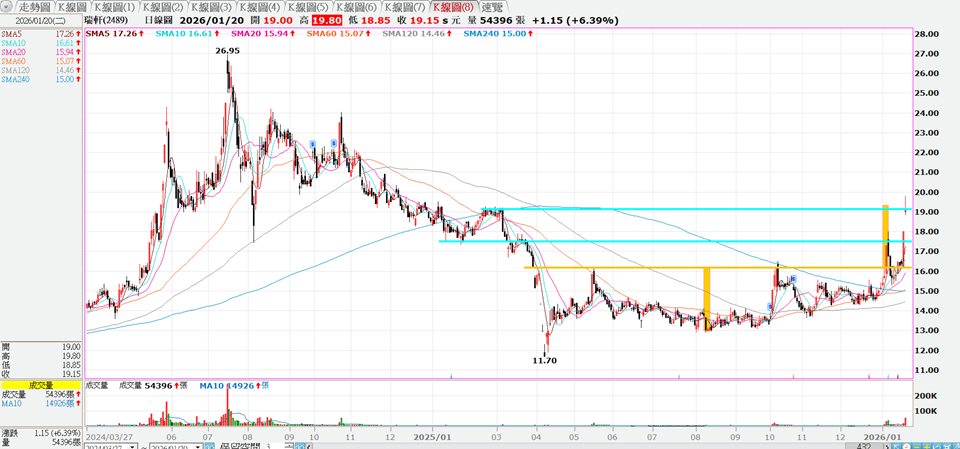   
  - 台玻(1802)  
    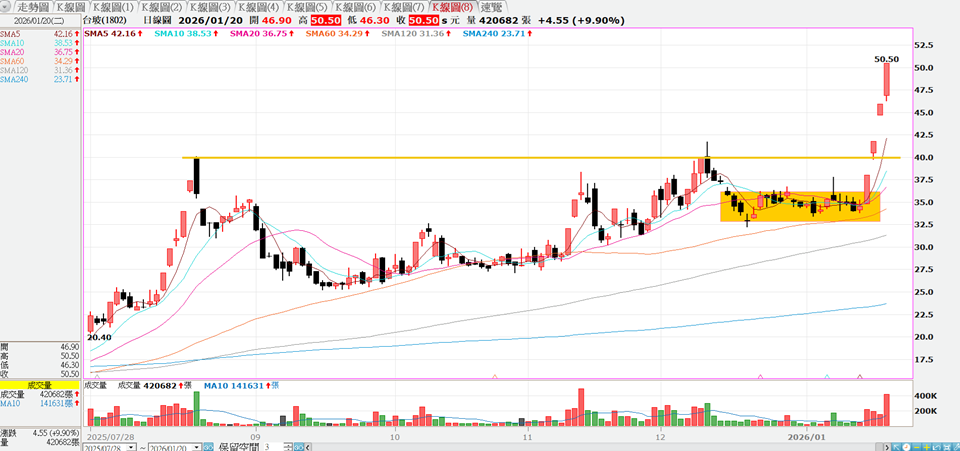   
  - 國際中橡(2104)  
    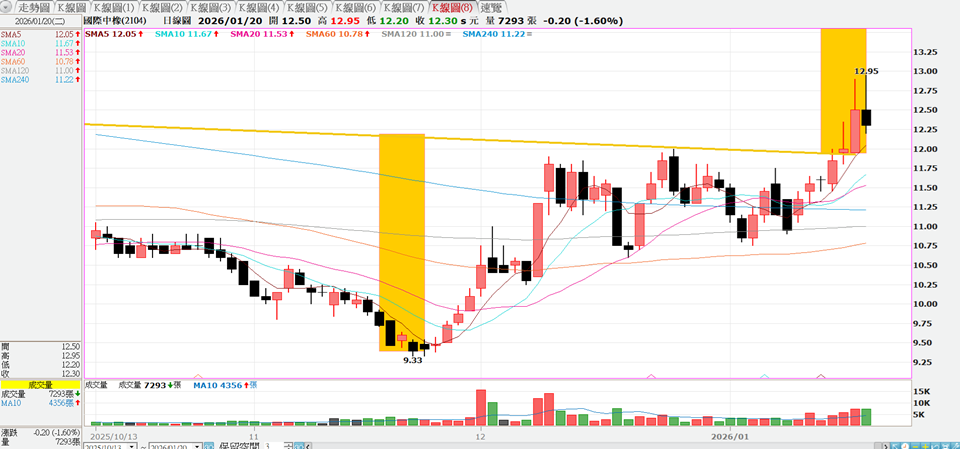   
  - 太欣(5302)  
    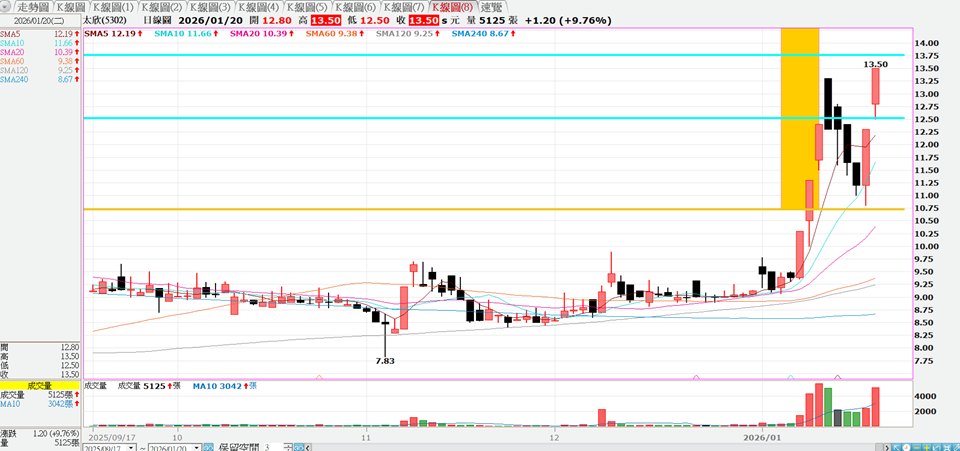   
  - 美食-KY(2723)  
    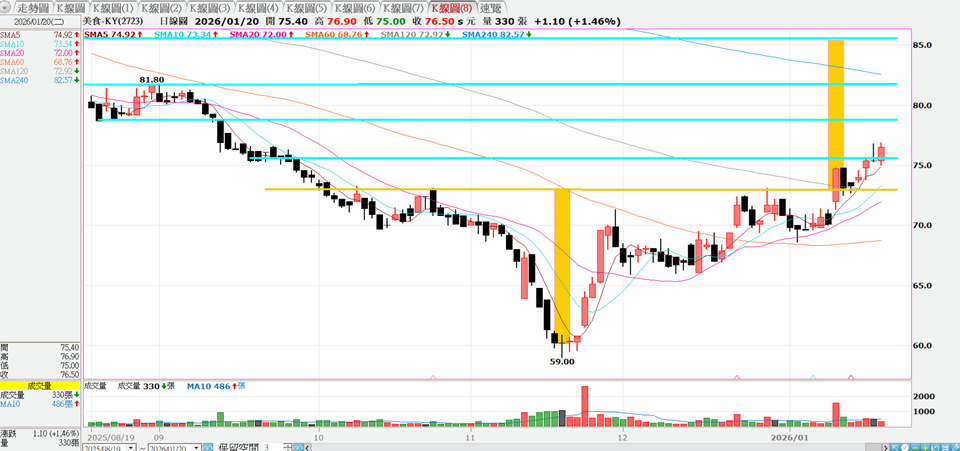   
  - 聯電(2303)  
    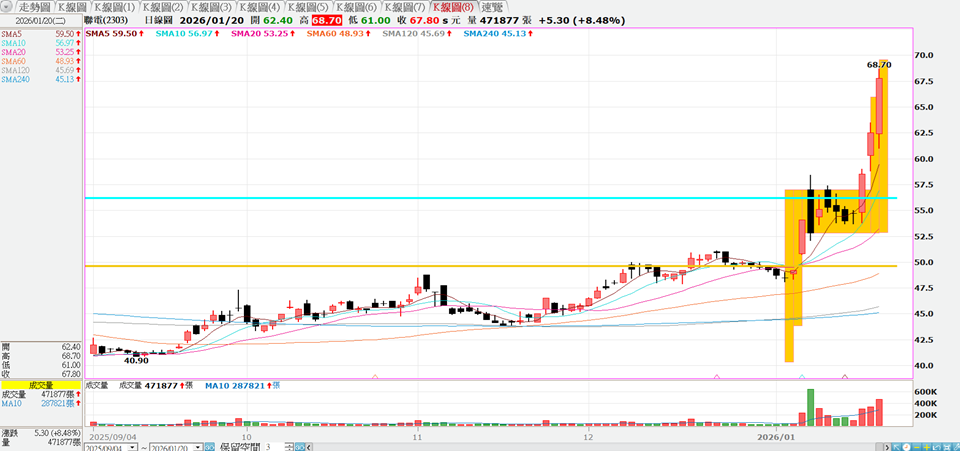   
  - 飛宏(2457)  
    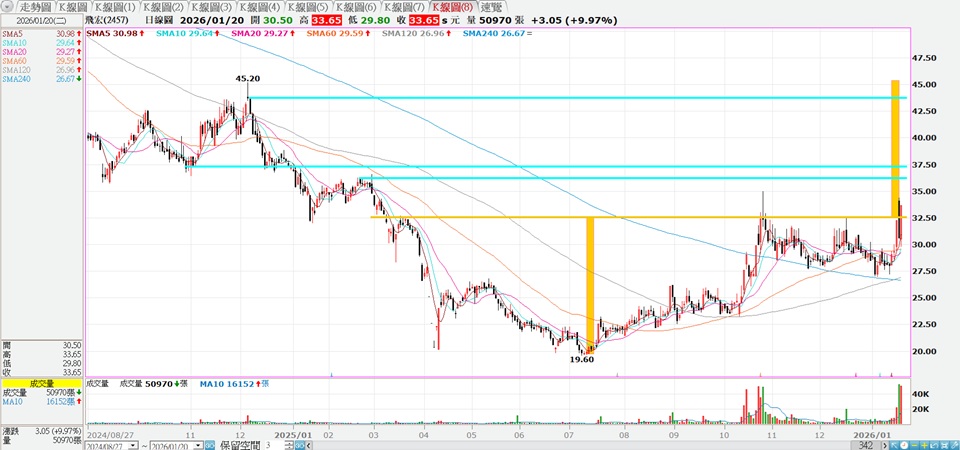    

* 觀察股列表  
  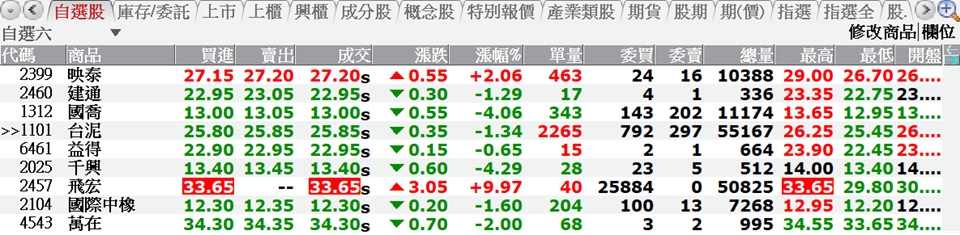   

### 個股解盤  

* 國喬(1312)  
  看法：短線轉弱，跌破下彎的5日線。回測底型頸線支撐。    

> **盤後**：量化技術分析  

解盤內容：


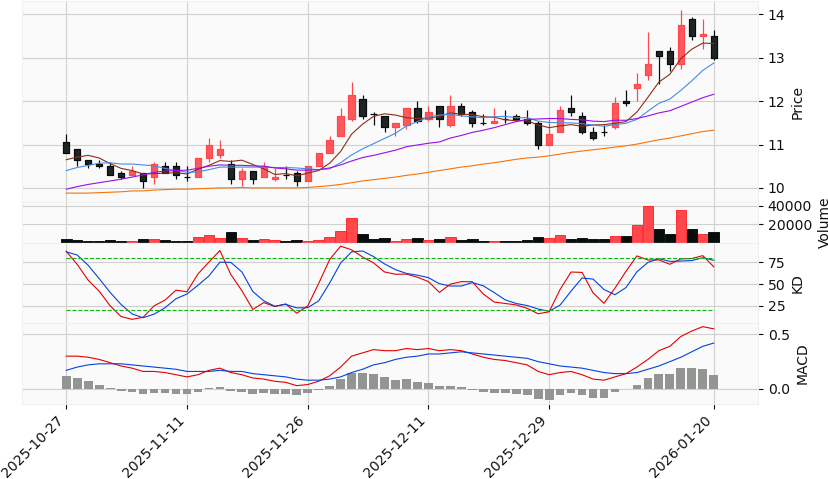

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-19 十字線 : 2026-01-19 吞噬 : 2026-01-15 孕育線／懷抱線 : 2026-01-19
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 11211張 ，十日均量 ＝ 16942張）
型態,盤整型態之矩形，型態範圍由2025-10-23開始到2025-11-25結束。 底型反轉之底部型態，型態範圍由2025-08-01開始到2025-10-09結束，2025-10-09時已達估算之目標價（10.19元）。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-20死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-05當週黃金交叉。
整體評價,價格趨勢 整體仍屬上漲趨勢：價格位於20日線與60日線之上，且中期均線維持上彎。惟近一日收黑回檔至5日線下方，短線轉為高檔震盪整理。 價量關係 先前上攻時量能明顯放大，帶動價格快速推升，屬「放量上漲」結構。近期回檔時量能相對收斂，偏向「縮量回檔」，賣壓尚未出現失控擴大。 支撐與壓力 支撐先看12.95元（近日低點）與12.88元（10日線附近），再來是12.16元（20日線附近）。壓力落在13.65元（近日高點）與14.10元（前高），若放量突破14.10元才有利延伸上漲波段。 KD指標解讀 K值自80以上回落至70附近，且K線下彎並跌破D線，顯示短線動能降溫、進入回檔修正。整體仍在50以上區間，偏多架構未被破壞，但需留意是否續跌往50靠攏。 MACD指標解讀 DIF仍在MACD線之上，偏多趨勢未變，但DIF略為走平下彎、柱狀體同步縮短，代表上漲動能正在減弱。若後續柱狀體續縮甚至翻負，將提高回檔延長的機率。 綜合評價 中期多頭結構仍在，但短線屬高檔回檔整理，關鍵在12.88～12.95元支撐帶能否守穩。操作上偏向「守支撐、看量能」：守穩支撐且量能回升，有利再測13.65元與14.10元；若跌破12.88元，回檔可能加深至20日線附近。


In [13]:
stock_analysis(analysis,'1312')

> **盤後**：底部反轉交易策略分析  

In [14]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-10-23'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-09']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-09'
    bottom_price = range_prices.loc['2025-04-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-12'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為15.89元


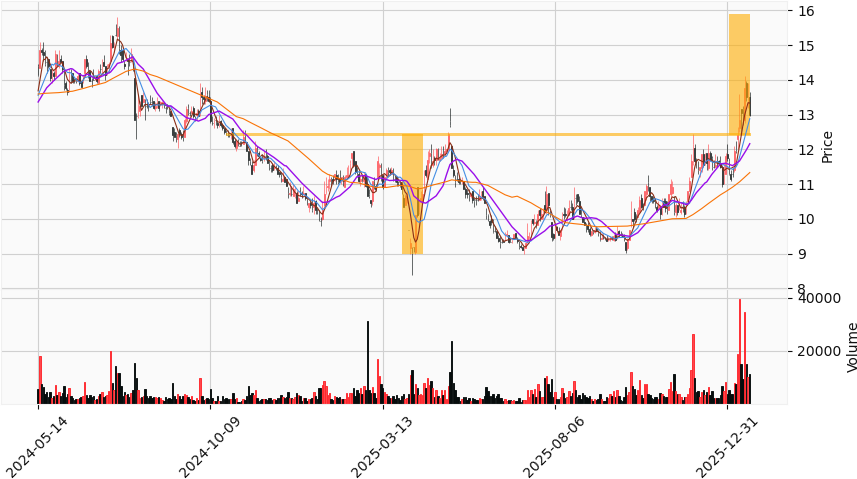

In [15]:
image = mysys.DrawOnKlineChart('1312','2024-05-14','2026-01-20',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  

* 台泥(1101)  
  看法：遇年線反壓拉回。  

> **盤後**：量化技術分析  

底型反轉交易策略：


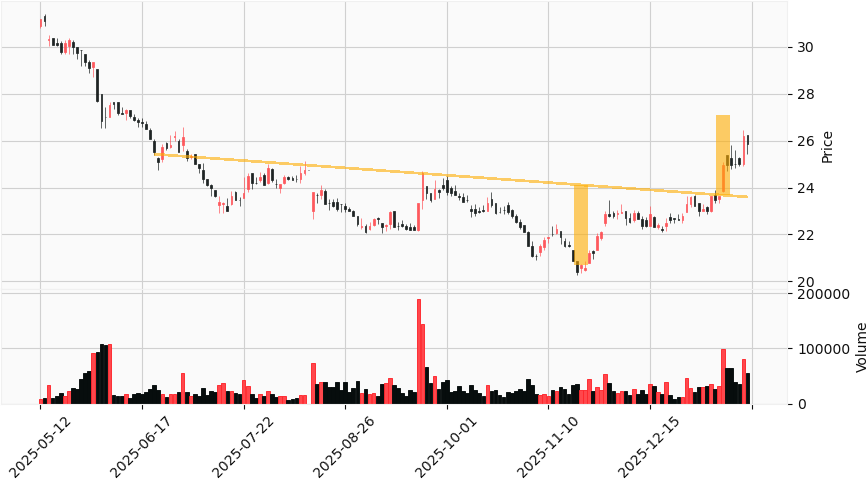

解盤內容：


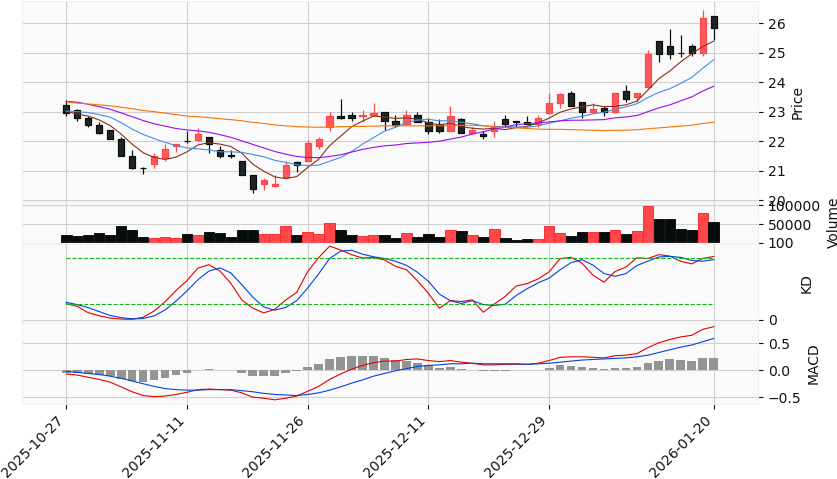

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-15 十字線 : 2026-01-15 吞噬 : 2026-01-16 , 2026-01-19 孕育線／懷抱線 : 2026-01-14"
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：成交量大於十日均量，但未至大量門檻（成交量 ＝ 55434張 ，十日均量 ＝ 53046張）
型態,底型反轉之底部型態，型態範圍由2025-06-20開始到2026-01-12結束，估算目標價為27.09元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2026-01-19黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。並且2026-01-19該週在超買區。
整體評價,價格趨勢 目前為上漲趨勢，近幾日價格自約25元區間快速推升至26元附近後出現高檔震盪。短期均線上彎且位於中期均線之上，顯示多方結構仍在。 價量關係 上漲段伴隨明顯放量（突破拉抬日量能最大），屬於價漲量增的偏多訊號。最新一日收黑且量能較前一日縮，偏向高檔換手後的短線整理/回檔型態。 支撐與壓力 壓力先看 26.25元～26.45元（近期高點區），若放量突破才有利續攻。支撐先看 25.40元（短期均線附近）與 25.45元～25.00元（近期低點/整數關卡），跌破25.00元則短線轉弱風險升高。 KD 指標解讀 K與D位於80附近的高檔區，屬於偏熱但尚未明顯轉弱的狀態。若後續K線向下跌破D線，較容易引發短線回檔；反之維持高檔鈍化則仍有續強空間。 MACD 指標解讀 DIF位於MACD線之上且兩者同步上行，多方趨勢延續。柱狀體維持正值且放大後持平，代表上攻動能仍在，但短線動能有趨於平緩的跡象。 綜合評價 整體偏多，屬於上漲趨勢中的高檔整理，關鍵在26.25元～26.45元能否有效突破。操作上可留意25.40元與25.00元支撐是否守穩；若失守，短線宜提高停損/降槓桿以防回檔擴大。


In [16]:
stock_analysis(analysis,'1101',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [17]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-19'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為29.30元


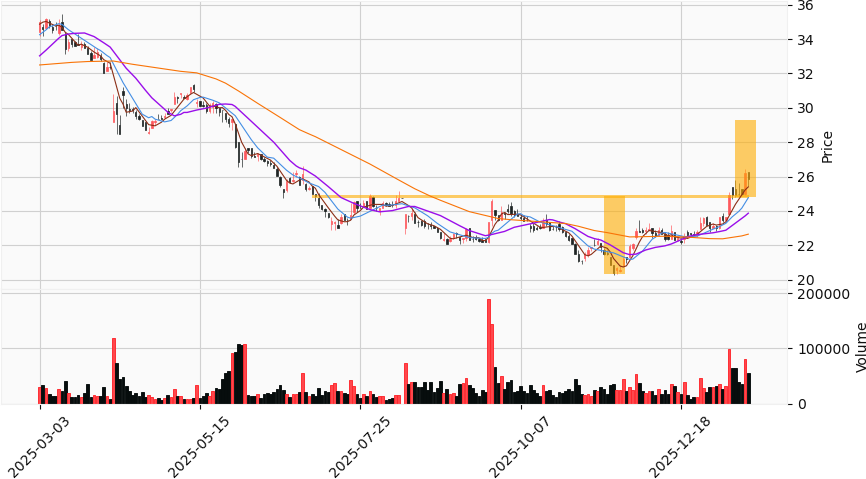

In [18]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-01-20',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  

* 千興(2025)  
  看法：回測5日線支撐有守。    

> **盤後**：量化技術分析  

解盤內容：


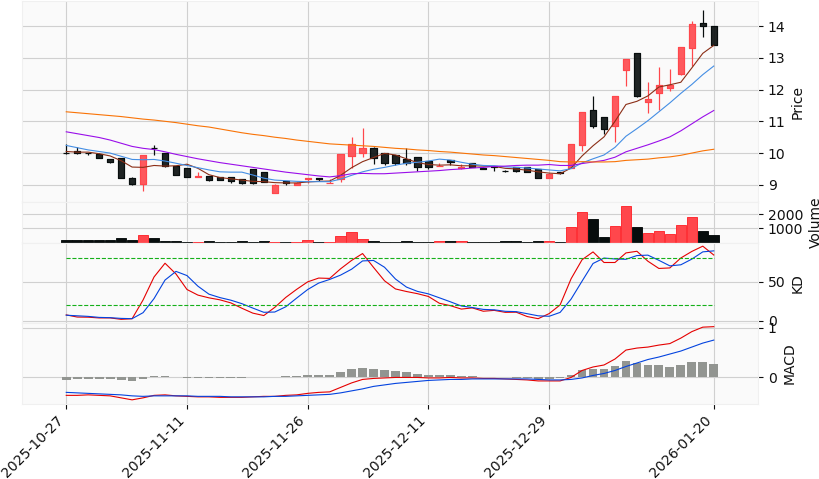

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-14 , 2026-01-19 十字線 : 2026-01-19"
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 518張 ，十日均量 ＝ 1137張）
型態,底型反轉之底部型態，型態範圍由2025-10-15開始到2026-01-02結束，2026-01-08時已達估算之目標價（11.86元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-20死亡交叉。並且2026-01-20於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-29當週黃金交叉。
整體評價,價格趨勢 目前為上漲格局，近五日由約 12.15元快速推升至高點 14.50元後，最新收在 13.40元出現回檔。短期均線（5日、10日）明顯上彎且位於中期均線（20日、60日）之上，趨勢仍偏多但高檔震盪加劇。 價量關係 上漲段量能明顯放大（推升期量增），顯示追價動能曾強。近兩日量能明顯縮減且收黑/回落，屬於高檔量縮回檔，短線動能轉為降溫。 支撐與壓力 支撐先看 13.39元（5日線附近）與 13.40元（近期回檔低點/收盤），跌破則看 12.74元（10日線）作為下一道支撐。壓力先看 14.00元（近期收盤密集區）與 14.50元（近期高點），若能放量站回 14.50元上方才有利延續攻勢。 KD 指標解讀 K值仍在80以上屬高檔區，但已由高點回落，且K值低於D值，呈現高檔鈍化後轉弱的訊號。短線較容易延續震盪或再回檔，需觀察是否回到80下方並擴大走弱。 MACD 指標解讀 DIF線位於MACD線之上且兩者仍向上，趨勢方向維持偏多。惟灰色柱狀體（OSC）由高點縮小，代表上漲動能開始收斂，短線可能以整理/回檔消化漲幅。 綜合評價 整體仍屬多頭趨勢中的高檔整理：趨勢偏多未破，但量能降溫、KD高檔轉弱與MACD動能收斂，短線不利再急拉。操作上以 13.39元～13.40元支撐是否守穩作為強弱分界，守穩則偏多續抱、跌破則提防回檔加深至 12.74元附近。


In [19]:
stock_analysis(analysis,'2025')

> **盤後**：底部反轉交易策略分析  

In [20]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-08'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-19']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-15'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為16.93元


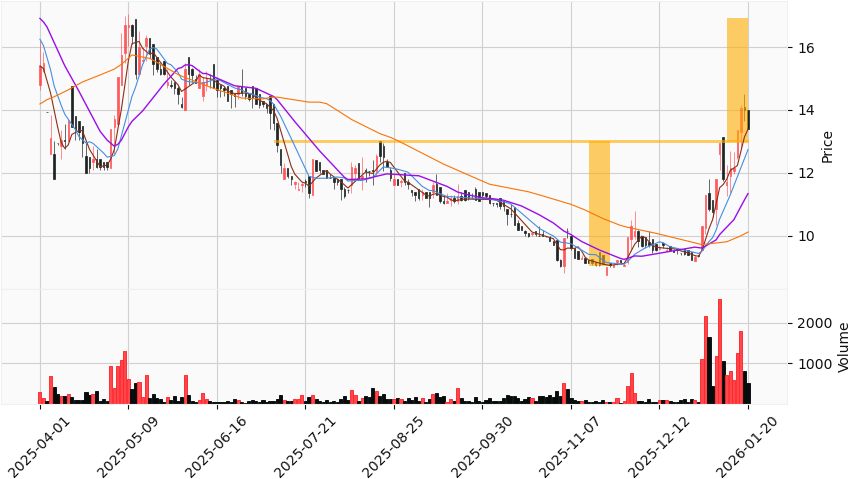

In [21]:
image = mysys.DrawOnKlineChart('2025','2025-04-01','2026-01-20',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。   
融資中立(0)、融券中立(0)。  